# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open('image-predictions.tsv', 'wb').write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# We will query Twitter API for each tweet in the Twitter archive and write its JSON in a text file
# The following lines of code will perform the task
consumer_key = 'I have removed it'
consumer_secret = 'I have removed it'
access_token = 'I have removed it'
access_secret = 'I have removed it'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Let us take the Tweet IDs we will be gathering additional data for, via Twitter's API.
# We will take the IDs from the tweet_id column of the twitter_archive_enhanced dataframe
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Now let us query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dictionary = {}
start = timer()
# Let us save each tweet's JSON data gotten as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as error:
            print("Fail")
            fails_dictionary[tweet_id] = error
            pass
end = timer()
# The time taken for the operation
print(end - start)
# A dictionary showing tweet_id of tweets Tweepy couldn't get due to error
print(fails_dictionary)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [4]:
# Let us read the text file and split its lines so that every entry will be on a new line
tweet_json = open('tweet_json.txt', encoding='UTF-8')
read_data = tweet_json.read()
file = read_data.splitlines()

In [5]:
# Let's gather all tweet IDs in a list called tweet_id
tweet_id = []

for i in range(len(file)):
    identity = file[i].split('"id": ')[1]
    ID = identity.split(',')[0]
    tweet_id.append(ID)

# Let's see the length of the tweet_id list
len(tweet_id)

2327

In [6]:
# let's gather all retweet counts in a list called retweet_count
retweet_count = []

for i in range(len(file)):
    count = file[i].split('"retweet_count": ')[1]
    ret_count = count.split(',')[0]
    retweet_count.append(ret_count)

# Let's see the length of the retweet_count list
len(retweet_count)

2327

In [7]:
# let's gather all favorite counts in a list called favorite_count
favorite_count = []

for i in range(len(file)):
    cnt = file[i].split('"favorite_count": ')[1]
    fave_count = cnt.split(',')[0]
    favorite_count.append(fave_count)

# Let's see the length of the favorite_count list
len(favorite_count)

2327

In [8]:
# Now that we have the tweet_id, retweet_count and favorite_count, let's read them into a pandas DataFrame named tweepy_data.
tweepy_data = pd.DataFrame({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})
tweepy_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7007,33810
1,892177421306343426,5301,29330
2,891815181378084864,3480,22047
3,891689557279858688,7226,36935
4,891327558926688256,7759,35311


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweepy_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7007,33810
1,892177421306343426,5301,29330
2,891815181378084864,3480,22047
3,891689557279858688,7226,36935
4,891327558926688256,7759,35311


In [14]:
tweepy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null object
favorite_count    2327 non-null object
dtypes: object(3)
memory usage: 54.6+ KB


### Quality issues
1. The *tweet_id*, *timestamp*, *retweeted_status_timestamp*, *retweeted_status_id* and *retweeted_status_user_id* columns of the **twitter_archive_enhanced** table have wrong data types.


2. Entries like **a, an, the, None** on the **name** column of the **twitter_archive_enhanced** table.


3. The entry **"None"** on the doggo, floofer, pupper and puppo columns of the **twitter_archive_enhanced** table.


4. Invalid entries on the *source* column of the **twitter_archive_enhanced** table. The texts **<a href=** and **rel="nofollow"Twitter for iPhone** should be removed so that we will have valid urls as sources.


5. The *tweet_id* column of the **image_predictions** table has the wrong data type.


6. Incomplete number of rows in the **image_predictions** table. It has 2075 rows instead of 2356 rows.


7. The *retweet_count* and *favorite_count* columns of the **tweepy_data** table have **string** data type instead of **int**.


8. Incomplete number of rows in the **tweepy_data** table. The table has 2327 rows instead of 2356 rows.

### Tidiness issues
1. The timestamp column of the **twitter_archive_enhanced** table is a combination of date and time. It should be splitted to form a column for each metric. This will enable us to filter our data based on a specific period or time limit of a given day (e.g morning, afternoon, 7am - 8am, e.t.c).


2. In the **twitter_archive_enhanced** table, rows containing *retweeted_status_id* should be dropped since we are not considering retweets in this project. We only want original ratings that have images.


3. Some columns in the **twitter_archive_enhanced** and **image_predictions** tables will not be needed for my analysis. It is best to drop them.


4. The doggo, floofer, pupper and puppo columns of the **tweet_archive_enhanced** table should be merged together to form a column called dog_stage.


5. We have three different but related tables. Merging the tables to form one table will enhance tidiness.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [15]:
# Make copies of original pieces of data
df1 = twitter_archive_enhanced.copy()
df2 = image_predictions.copy()
df3 = tweepy_data.copy()

## Quality Issues

### Issue #1:

#### Define:
The *tweet_id*, *timestamp*, *retweeted_status_timestamp*, *retweeted_status_id* and *retweeted_status_user_id* columns of the **twitter_archive_enhanced** table have wrong data types.

- The *tweet_id* column has **int** data type instead of **string** data type.
- The *timestamp* column has **string** data type instead of **datetime** data type.
- The *retweeted_status_timestamp* column has **string** data type instead of **datetime** data type.
- The *retweeted_status_id* column has **float** data type instead of **string** data type.
- The *retweeted_status_user_id* column has **float** data type instead of **string** data type.

Let use convert the aforementioned columns to their appropriate data types.

#### Code

In [16]:
# For the tweet_id column
df1['tweet_id'] = df1['tweet_id'].astype('str')

In [17]:
# For the timestamp column
df1['timestamp'] = df1['timestamp'].astype('datetime64')

In [18]:
# For the retweeted_status_timestamp column
df1['retweeted_status_timestamp'] = df1['timestamp'].astype('datetime64')

In [19]:
# For the retweeted_status_id column
df1['retweeted_status_id'] = df1['retweeted_status_id'].fillna(0).astype(int)
df1['retweeted_status_id'] = df1['retweeted_status_id'].astype(str)
df1['retweeted_status_id'] = df1['retweeted_status_id'].replace({'0':np.nan})

In [20]:
# For the retweeted_status_user_id column
df1['retweeted_status_user_id'] = df1['retweeted_status_user_id'].fillna(0).astype(int)
df1['retweeted_status_user_id'] = df1['retweeted_status_user_id'].astype(str)
df1['retweeted_status_user_id'] = df1['retweeted_status_user_id'].replace({'0':np.nan})

#### Test:

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    2356 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### Issue #2:

#### Define:
Entries like **a, an, the, None** on the **name** column of the **twitter_archive_enhanced** table. These entries are not names. So let us replace them with Nan to indicate missing values.

#### Code:

In [22]:
df1['name'] = df1['name'].replace({'a':np.nan,'an':np.nan,'the':np.nan,'None':np.nan})

#### Test:

In [23]:
# Let us check the unique entries of the name column if anything like "a", "an", "the" or "None" will show up.
df1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout', 'Gizmo',
       'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 

### Issue #3:

#### Define:
The entry **"None"** on the doggo, floofer, pupper and puppo columns of the **twitter_archive_enhanced** table. Let us replace None with Nan.

#### Code:

In [24]:
df1['doggo'] = df1['doggo'].replace('None',np.nan)
df1['floofer'] = df1['floofer'].replace('None',np.nan)
df1['pupper'] = df1['pupper'].replace('None',np.nan)
df1['puppo'] = df1['puppo'].replace('None',np.nan)

#### Test:

In [25]:
df1[['tweet_id','name','doggo','floofer','pupper','puppo']].head(10)

,tweet_id,name,doggo,floofer,pupper,puppo
0,892420643555336193,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,Cassie,doggo,NaN,NaN,NaN


### Issue #4:

#### Define:
Invalid entries on the *source* column of the **twitter_archive_enhanced** table. The texts **<a href=** and **rel="nofollow"Twitter for iPhone** should be removed so that we will have valid urls as sources.

#### Code:

In [26]:
# Let us create an empty list that will contain the valid sources.
source = []
# Let us extract the valid sources and put them inside the created list.
for i in range(len(df1['source'])):
    source_url = df1['source'][i].split('"')[1]
    source.append(source_url)
# Let us read the list into a pandas dataframe.   
df_source = pd.DataFrame(source, columns=['source'])
# The length of the new dataframe has to be equal to the length of tweet_archive_enhanced table (which is 2356). Let us see if this has been achieved.
len(df_source)

2356

In [27]:
df1['source'] = df_source['source']

#### Test:

In [28]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #5:

#### Define:
The *tweet_id* column of the **image_predictions** table has the wrong data type. The values of this column have to be in string format. Hence, we change the data type to **string**.

#### Code:

In [29]:
df2['tweet_id'] = df2['tweet_id'].astype('str')

#### Test:

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #6:

#### Define:
Incomplete number of rows in the **image_predictions** table. It has 2075 rows instead of 2356 rows. 

We will not be able to rectify this issue as we do not have access to the **neural network** that was used for the image predictions.

### Issue #7:

#### Define:
The *retweet_count* and *favorite_count* columns of the **tweepy_data** table have **string** data type instead of **int**. Let us change the data type of each of the columns to **int**.

#### Code:

In [31]:
df3['retweet_count'] = df3['retweet_count'].astype('int')
df3['favorite_count'] = df3['favorite_count'].astype('int')

#### Test:

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Issue #8:

#### Define:
Incomplete number of rows in the **tweepy_data** table. The table has 2327 rows instead of 2356 rows. As such, 59 rows are missing.

Let us iterate that the **tweepy_data** table was derived from data gotten via the **Twitter API**. Also, we recall that the **twitter_archive_enhanced.csv** file was downloaded before additional data was sourced via the **Twitter API**. For these reasons, we conclude that the tweets which make up the 59 missing rows have been deleted before we sourced for additional data via the **Twitter API**. Hence, this issue cannot be rectified.

## Tidiness issues

### Issue #1:

#### Define:
The timestamp column of the **tweet_archive_enhanced** table is a combination of date and time. Let us split it so we will have date and time columns separately. This will enable us to filter our data based on a specific period or time limit of a given day (e.g morning, afternoon, 7am-8am, e.t.c).

#### Code:

In [33]:
df1['date'] = [date.date() for date in df1['timestamp']]
df1['time'] = [time.time() for time in df1['timestamp']]

#### Test:

In [34]:
df1[['tweet_id','timestamp','date','time']].head()

,tweet_id,timestamp,date,time
0,892420643555336193,2017-08-01 16:23:56,2017-08-01,16:23:56
1,892177421306343426,2017-08-01 00:17:27,2017-08-01,00:17:27
2,891815181378084864,2017-07-31 00:18:03,2017-07-31,00:18:03
3,891689557279858688,2017-07-30 15:58:51,2017-07-30,15:58:51
4,891327558926688256,2017-07-29 16:00:24,2017-07-29,16:00:24


### Issue #2:

#### Define:
In the **twitter_archive_enhanced** table, rows containing *retweeted_status_id* should be dropped since we are not considering retweets in this project. We only want original ratings that have images.

#### Code:

In [35]:
df1 = df1[df1['retweeted_status_id'].isnull()]

#### Test:

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    2175 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1426 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
date                       

### Issue #3:

#### Define:
Some columns in the **twitter_archive_enhanced** and **image_predictions** tables will not be needed for my analysis. It is best to drop them.

#### Code:

In [37]:
df1 = df1[['tweet_id','date','time','source','rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo']]
df2 = df2[['tweet_id','p1','p1_dog','p2','p2_dog','p3','p3_dog']]

#### Test

In [38]:
df1.head()

,tweet_id,date,time,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,16:23:56,http://twitter.com/download/iphone,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,00:17:27,http://twitter.com/download/iphone,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31,00:18:03,http://twitter.com/download/iphone,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30,15:58:51,http://twitter.com/download/iphone,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29,16:00:24,http://twitter.com/download/iphone,12,10,Franklin,NaN,NaN,NaN,NaN


In [39]:
df2.head()

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
0,666020888022790149,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True
1,666029285002620928,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True
2,666033412701032449,German_shepherd,True,malinois,True,bloodhound,True
3,666044226329800704,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True
4,666049248165822465,miniature_pinscher,True,Rottweiler,True,Doberman,True


### Issue #4:

#### Define:
The doggo, floofer, pupper and puppo columns of the **tweet_archive_enhanced** column should be merged together to form a column called dog_stage. We can then drop the doggo, floofer, pupper and puppo columns after this.

#### Code:

In [40]:
# Let us create the dog stage column.
df1['dog_stage'] = df1['doggo'].replace(np.nan,'') + df1['floofer'].replace(np.nan,'') + df1['pupper'].replace(np.nan,'') + df1['puppo'].replace(np.nan,'')
df1['dog_stage'] = df1['dog_stage'].replace({'':np.nan,'doggopupper':'doggo,pupper','doggopuppo':'doggo,puppo','doggofloofer':'doggo,floofer'})

In [41]:
# Let us drop the doggo, floofer, pupper and puppo columns since we now have dog stage.
df1 = df1.drop(['doggo','floofer','pupper','puppo'], axis=1)

#### Test:

In [42]:
df1.head(20)

,tweet_id,date,time,source,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01,16:23:56,http://twitter.com/download/iphone,13,10,Phineas,NaN
1,892177421306343426,2017-08-01,00:17:27,http://twitter.com/download/iphone,13,10,Tilly,NaN
2,891815181378084864,2017-07-31,00:18:03,http://twitter.com/download/iphone,12,10,Archie,NaN
3,891689557279858688,2017-07-30,15:58:51,http://twitter.com/download/iphone,13,10,Darla,NaN
4,891327558926688256,2017-07-29,16:00:24,http://twitter.com/download/iphone,12,10,Franklin,NaN
5,891087950875897856,2017-07-29,00:08:17,http://twitter.com/download/iphone,13,10,NaN,NaN
6,890971913173991426,2017-07-28,16:27:12,http://twitter.com/download/iphone,13,10,Jax,NaN
7,890729181411237888,2017-07-28,00:22:40,http://twitter.com/download/iphone,13,10,NaN,NaN
8,890609185150312448,2017-07-27,16:25:51,http://twitter.com/download/iphone,13,10,Zoey,NaN
9,890240255349198849,2017-07-26,15:59:51,http://twitter.com/download/iphone,14,10,Cassie,doggo


### Issue #5:

#### Define:
We have three different but related tables. Merging the tables to form one table will enhance tidiness.

#### Code:

In [43]:
# The three tables are; df1, df2 and df3. Let us merge them to form one. We want to merge them on tweet_id.
df_all = df1.merge(df2, on='tweet_id')
df_all = df_all.merge(df3, on='tweet_id')

#### Test:

In [44]:
df_all.head()

,tweet_id,date,time,source,rating_numerator,rating_denominator,name,dog_stage,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,16:23:56,http://twitter.com/download/iphone,13,10,Phineas,NaN,orange,False,bagel,False,banana,False,7007,33810
1,892177421306343426,2017-08-01,00:17:27,http://twitter.com/download/iphone,13,10,Tilly,NaN,Chihuahua,True,Pekinese,True,papillon,True,5301,29330
2,891815181378084864,2017-07-31,00:18:03,http://twitter.com/download/iphone,12,10,Archie,NaN,Chihuahua,True,malamute,True,kelpie,True,3480,22047
3,891689557279858688,2017-07-30,15:58:51,http://twitter.com/download/iphone,13,10,Darla,NaN,paper_towel,False,Labrador_retriever,True,spatula,False,7226,36935
4,891327558926688256,2017-07-29,16:00:24,http://twitter.com/download/iphone,12,10,Franklin,NaN,basset,True,English_springer,True,German_short-haired_pointer,True,7759,35311


In [45]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 16 columns):
tweet_id              1986 non-null object
date                  1986 non-null object
time                  1986 non-null object
source                1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1373 non-null object
dog_stage             305 non-null object
p1                    1986 non-null object
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_dog                1986 non-null bool
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
dtypes: bool(3), int64(4), object(9)
memory usage: 223.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
df_all.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Data Exploration:

In [47]:
df_all.head()

,tweet_id,date,time,source,rating_numerator,rating_denominator,name,dog_stage,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,16:23:56,http://twitter.com/download/iphone,13,10,Phineas,NaN,orange,False,bagel,False,banana,False,7007,33810
1,892177421306343426,2017-08-01,00:17:27,http://twitter.com/download/iphone,13,10,Tilly,NaN,Chihuahua,True,Pekinese,True,papillon,True,5301,29330
2,891815181378084864,2017-07-31,00:18:03,http://twitter.com/download/iphone,12,10,Archie,NaN,Chihuahua,True,malamute,True,kelpie,True,3480,22047
3,891689557279858688,2017-07-30,15:58:51,http://twitter.com/download/iphone,13,10,Darla,NaN,paper_towel,False,Labrador_retriever,True,spatula,False,7226,36935
4,891327558926688256,2017-07-29,16:00:24,http://twitter.com/download/iphone,12,10,Franklin,NaN,basset,True,English_springer,True,German_short-haired_pointer,True,7759,35311


In [48]:
df_all['dog_stage'].value_counts()

pupper           203
doggo             62
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [49]:
df_all['source'].value_counts()

http://twitter.com/download/iphone              1948
http://twitter.com                                28
https://about.twitter.com/products/tweetdeck      10
Name: source, dtype: int64

In [50]:
# Let us create a column to show us the ratings in decimal
df_all['rating'] = df_all['rating_numerator']/df_all['rating_denominator']

In [51]:
df_all.head(2)

,tweet_id,date,time,source,rating_numerator,rating_denominator,name,dog_stage,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01,16:23:56,http://twitter.com/download/iphone,13,10,Phineas,NaN,orange,False,bagel,False,banana,False,7007,33810,1.3
1,892177421306343426,2017-08-01,00:17:27,http://twitter.com/download/iphone,13,10,Tilly,NaN,Chihuahua,True,Pekinese,True,papillon,True,5301,29330,1.3


In [52]:
df_all.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,12.281974,10.534240,2243.266868,7709.324773,1.169125
std,41.581180,7.335369,4018.487366,11373.611982,4.075250
min,0.000000,2.000000,11.000000,66.000000,0.000000
25%,10.000000,10.000000,495.250000,1636.000000,1.000000
50%,11.000000,10.000000,1079.500000,3465.000000,1.100000
75%,12.000000,10.000000,2557.750000,9556.750000,1.200000
max,1776.000000,170.000000,70721.000000,144860.000000,177.600000


### Insights:
1. Pupper is the most represented dog stage on this dataset.


2. The source's value counts shows that WeRateDogs tweets mostly with the twitter app for iPhone. 


3. The minimum rating of dogs by WeRateDogs is **zero** while the maximum rating is **177.6**.


4. The minimum number of retweets WeRateDogs got for a tweet is **11** while the maximum is **70,721**.


5. The minimum number of likes WeRateDogs got for a tweet is **66** while the maximum is **144,860**.

### Visualizations:

#### The visual below contains the number of dogs per dog Stage

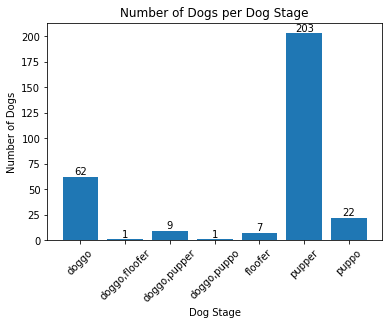

In [53]:
df4 = df_all['dog_stage'].value_counts()
df4 = df4.reset_index()
df4 = df4.rename(columns={'dog_stage':'number_of_dogs','index':'dog_stage'})
plt.bar(df4['dog_stage'],df4['number_of_dogs'])
plt.xlabel('Dog Stage')
plt.ylabel('Number of Dogs')
plt.title('Number of Dogs per Dog Stage')
plt.xticks(rotation=45)
for i in range(len(df4['number_of_dogs'])):
    plt.annotate(str(df4['number_of_dogs'][i]), xy=(df4['dog_stage'][i],df4['number_of_dogs'][i]), ha='center', va='bottom')

#### The visual below shows the distribution of retweet_count and favorite_count across the tweets of this dataset

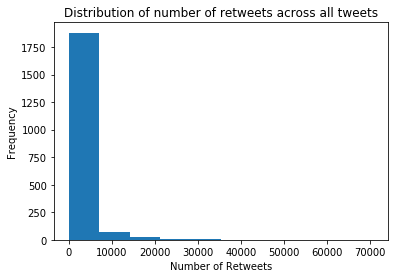

In [54]:
df5 = df_all.drop_duplicates()
# Let's define a function for this histogram as be will be using it once again.
def histplot(a,b,c):
    a.plot.hist()
    plt.xlabel(b)
    plt.title(c);
histplot(df5['retweet_count'], 'Number of Retweets', 'Distribution of number of retweets across all tweets')

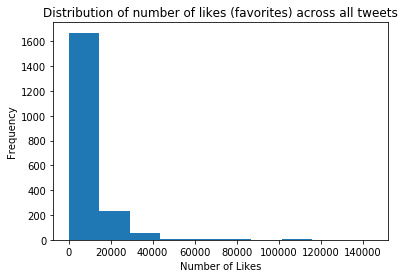

In [55]:
# Let us use the defined function for the second plot.
histplot(df5['favorite_count'], 'Number of Likes', 'Distribution of number of likes (favorites) across all tweets')

**Conclusion**: The distribution of retweet_count (number of retweets) and favorite_count (number of likes) are both skewed to the right.